In [1]:
import tweepy
import json
import pandas as pd
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json

# auth = tweepy.OAuthHandler('pDTew77DG73j4Uw3F77TwOjIv', 
#                            '5k2PR5qe8lscU4gIu5sBAENDl4qv7iM5DvMHIMTP548hUZgDTj')
# auth.set_access_token('884823122804785152-kZkORKatNrfHwAbSF1qTpLG2lGsCSfJ', 
#                       'S6jWxVVBO3aAT4B6o4Pq6NoWU4BCzLbNgaRt692cm7TE4')

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [2]:
# ids = []
# for page in tweepy.Cursor(api.followers, screen_name="montrealdesign").items():
#     ids.append(page._json)


# len(ids)

In [17]:
# with open('data.json', 'w') as fp:
#     json.dump(ids, fp)
    

In [3]:
# with open('data.json') as json_data:
#     ids = json.load(json_data)


In [4]:
# number is montrealdesign 
# followers_dict = {'montrealdesign':ids}


In [272]:
with open('topic_users.json') as json_data:
    followers_dict = json.load(json_data)

In [226]:
for follow in followers_dict['SalaunW']:
    print(follow['screen_name'])

Wax_Kent
chelios4ever
resolv204
Bettybrant8
LiguesMajeures
shlomoY14
PascalFournet
nature_faces
Roxane95119100
MLauvaine
GuyBrassard11
VnHong71684032
FanatiqueMV
Ricleger8
laurainecourti1
RueMorinCom
NickPereiraSLB
Godbout25
stephanechaput1
Jaypeezzzz
landerjp
Galchy94_Love
domi7357
PatScaly5
MatJolin
thehockeybarn1
KarolAnnAntille
ElBigGT
SimonTurcotte1
Branden29372731
sylvie35632319
Peteryes9
LauraRi70284049
Rouzlan97
TremblayYEG
djogbenon
alicemaunet2
HugoBoulet
habsfan85
DanielleDufer
dale_l_sheehan
BeautifulHotMJ
DupontHellena
JokeCoeur
AouadRanya
Gab_Duhamel99
jeancorry
Mellani37723281
saivinesh_k
stephan26931584
VoyerBenoit
drbazz20
BourgEliane
Midtowne38
JulPr
MarcelDesjardi3
DavidetClaudia
MelvineSasha
frankysport75
MathParadis
Prabhnor0812
PascalDufresne2
Elizabe99198818
stephanesss21
MocJock
TheBoxingBrits
Sarowar_Parvej
BourbonBonesAZ
Mr_Khanya
merrickselt
GaulAlain
SteveBrookesMBE
akytachan
ElComoryano
F_Kervarec
joe_legros
route_du_junior
TripleX137
MashPR
Ashley10688547


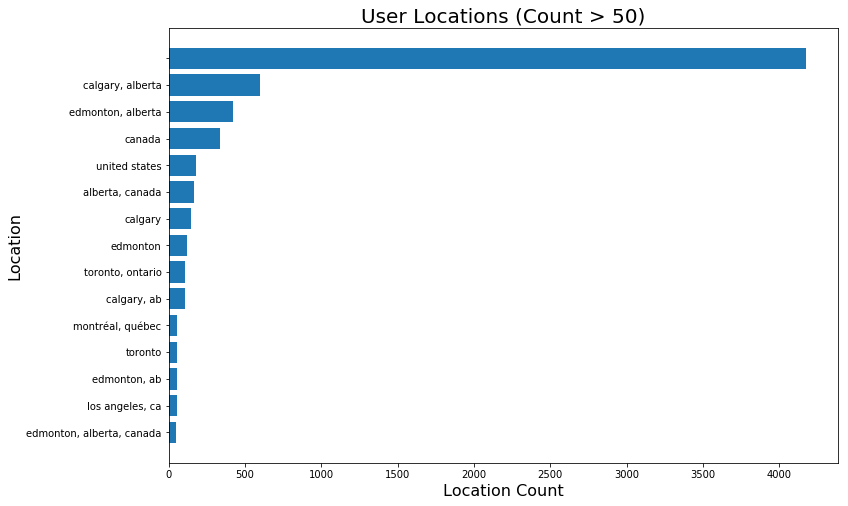

In [273]:
locs = []
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
for users in followers_dict.keys():
    for follower in followers_dict[users]:
        locs.append(follower['location'].lower())

locations_counted = Counter(locs).most_common()

y = []
x = []
for i in range(len(locations_counted)):
    if locations_counted[i][1] > 50:
        x.append(locations_counted[i][0])
        y.append(locations_counted[i][1])

plt.figure(figsize=(12,8))
plt.barh(x[::-1],y[::-1]) 
plt.xlabel("Location Count", size = 16)
plt.ylabel("Location", size = 16)
plt.title("User Locations (Count > 50)",size = 20)
plt.show()

In [274]:
us = None
max_ = 0
for users in followers_dict.keys():
    for follower in followers_dict[users]:
        if int(follower['followers_count']) > max_:
            us = follower['screen_name']
            max_ = follower['followers_count']

print(us, max_)
 

benlandis 3405548


In [100]:
len(followers_dict['HabsFanBruce001'])

200

In [464]:
network_vis = {}
users_in_calgary = {}

locations = ['edmonton', 'yeg','calgary', 'yyc']#,'alberta']#, 'canada', 'ca']
for users in followers_dict.keys():
    user_names = []
    calg_names = []
    for follower in followers_dict[users]:
        user_names.append(follower['screen_name'])
        if any(follower['location'].lower() in search_string for search_string in locations):
            if follower['location'] == '':
                continue
            calg_names.append(follower['screen_name'])
        
    network_vis[users] = user_names
    if calg_names != []:
        users_in_calgary[users] = calg_names
    
    





In [465]:
import networkx as nx
import matplotlib.pyplot as plt
import netgraph 

g = nx.DiGraph(network_vis)
print(g.number_of_nodes(), g.number_of_edges())

12426 13287


In [ ]:
sorted(.items(), key=lambda x:x[1], reverse=True)[:5]

In [277]:
print(sorted(g.out_degree(), key=lambda x:x[1], reverse=True)[:10])
print(sorted(g.in_degree(), key=lambda x:x[1], reverse=True)[:30])
x=nx.degree_centrality(g)

from operator import itemgetter
from collections import OrderedDict


sorted_x = OrderedDict(sorted(x.items(), key=itemgetter(1),reverse=True))
sorted_x


[('Tkachukyou', 250), ('nattyroons', 250), ('sam_corea', 250), ('JC_in_Calgary', 250), ('Kinger999', 250), ('ericcbarnes', 250), ('CanadianUnikorn', 250), ('CrazySteveC', 250), ('JasonP_YYC', 250), ('VincentRule', 250)]
[('AzorcanGlobal', 12), ('ZachBoychuk', 9), ('WTPuckHockey', 9), ('BobbyNickParody', 8), ('SpencerWeaver13', 7), ('TrackerFlames', 7), ('sidepix', 7), ('TLaboucan72', 6), ('dale_l_sheehan', 6), ('ChuckinNucksPod', 6), ('flamestrades', 6), ('FanofYYC', 6), ('Miaka65560219', 5), ('thehockeyprobe', 5), ('SeattleHockey5', 5), ('DJordatron', 5), ('ThePuck77', 5), ('spiderhead3', 5), ('noahadler1', 5), ('chernia_john', 5), ('EverythingOile1', 5), ('Sebstown', 5), ('StanfordJer', 5), ('Snakebite350', 5), ('Ade780', 5), ('JC_in_Calgary', 4), ('fakederekwills', 4), ('James53490786', 4), ('wdl09', 4), ('FakeOilersOwner', 4)]


OrderedDict([('JC_in_Calgary', 0.020840170659665244),
             ('Tkachukyou', 0.020676074827699377),
             ('CrazySteveC', 0.020676074827699377),
             ('zjlaing', 0.020676074827699377),
             ('sam_corea', 0.02059402691171644),
             ('Fan960Wills', 0.02059402691171644),
             ('jaonesix', 0.02059402691171644),
             ('TeamLG3', 0.02059402691171644),
             ('TommyChong840', 0.02059402691171644),
             ('emiily_morrison', 0.02059402691171644),
             ('ChadMulligan', 0.02059402691171644),
             ('ChinookArchYYC', 0.02059402691171644),
             ('nattyroons', 0.020511978995733506),
             ('Kinger999', 0.020511978995733506),
             ('ericcbarnes', 0.020511978995733506),
             ('CanadianUnikorn', 0.020511978995733506),
             ('JasonP_YYC', 0.020511978995733506),
             ('VincentRule', 0.020511978995733506),
             ('MykAussie', 0.020511978995733506),
             ('jeffmadam

In [362]:

OrderedDict(sorted(nx.eigenvector_centrality_numpy(g.reverse()).items(), key=itemgetter(1),reverse=True))

OrderedDict([('RedMilePodcast', 0.43470881851410986),
             ('JC_in_Calgary', 0.43470881851410964),
             ('ChinookArchYYC', 0.4347088185141096),
             ('jaonesix', 0.4347088185141092),
             ('zjlaing', 0.26866482505102934),
             ('CrazySteveC', 0.2686648250510292),
             ('emiily_morrison', 0.26866482505102884),
             ('turkeynator_85', 0.1660439934630805),
             ('TeamLG3', 1.4324939005773372e-16),
             ('Oil_Drop', 4.314694679317504e-17),
             ('LeoRegulus12', 6.366479188392916e-18),
             ('maxsmith_16', 6.111776837892398e-18),
             ('saifinajim21', 6.088441985001485e-18),
             ('beerguychris', 6.0751697591388954e-18),
             ('RachelRoxxx6', 6.0061730965136294e-18),
             ('Bearded_Bandit', 5.9208510296051015e-18),
             ('acevolleyclub', 5.803656475645928e-18),
             ('BradDeBoice', 5.798022402504569e-18),
             ('timmyjohnson7', 5.739020116654242e-18

In [279]:
degree_dict = dict(g.out_degree())

high_connection = []
for key in degree_dict.keys():
    if degree_dict[key] > 5:
        high_connection.append(key)
        
sub = g.subgraph(high_connection)
d = dict(nx.degree(sub))
plt.figure(figsize=(12,12)) 
print(sub.number_of_nodes())
# print(sub.number_of_edges())
# nx.draw(sub, pos=nx.spring_layout(sub), with_labels=True)


62


<Figure size 864x864 with 0 Axes>

In [549]:
from pyvis import network as net 
# Without reverse it is their followers, with reverse it is who they follow

to_reverse = True
if to_reverse:
    ego_graph = nx.ego_graph(g.reverse() ,'FanofYYC', radius=1, undirected=False, center=True)
else:
    ego_graph = nx.ego_graph(g ,'FanofYYC', radius=1, undirected=False, center=True)
if len(ego_graph.nodes()) > 800:
    print("Too many nodes for reasonable graph")
    ego_graph = None
   


In [550]:

G = net.Network("500", "900", notebook=True, directed=True)
G.from_nx(ego_graph)
grad = gradient ('#85C1E9', "#E59866", len(G.nodes))
for i, node in enumerate(G.nodes):
    #node['size'] = degree_dict[node['title']]
    node['color'] = grad[i]
    
if to_reverse:
    for i, edge in enumerate(G.edges):
        edge['title'] = "Follows"
else: 
     for i, edge in enumerate(G.edges):
        edge['title'] = "Has Follower"

G.show_buttons(filter_=['physics'])
G.repulsion(node_distance=200)
G.prep_notebook()
G.show("example.html")


In [380]:
import community
g2 = nx.Graph(network_vis)
communities = community.best_partition(g2)
nx.set_node_attributes(g2, communities, 'modularity')

In [349]:
community_nodes=[n for n in g2.nodes() if g2.node[n]['modularity'] == 42]

test = g2.subgraph(community_nodes)

G = net.Network("750", "1000", notebook=True, directed=True)
G.from_nx(test)
grad = gradient ('#6f2f7B', "#99fbb3", len(G.nodes))
for i, node in enumerate(G.nodes):
    #node['size'] = degree_dict[node['title']]
    node['color'] = grad[i]

G.show_buttons(filter_=['physics'])
G.repulsion(node_distance=200)
G.prep_notebook()
G.show("example2.html")


In [343]:
Counter(communities.values())


Counter({0: 744,
         1: 248,
         2: 236,
         3: 663,
         4: 249,
         5: 231,
         6: 221,
         7: 131,
         8: 238,
         9: 220,
         10: 444,
         11: 5,
         12: 137,
         13: 235,
         14: 242,
         15: 233,
         16: 248,
         17: 251,
         18: 241,
         19: 87,
         20: 242,
         21: 183,
         22: 235,
         23: 77,
         24: 186,
         25: 231,
         26: 236,
         27: 208,
         28: 219,
         29: 228,
         30: 188,
         31: 182,
         32: 208,
         33: 221,
         34: 241,
         35: 240,
         36: 244,
         37: 247,
         38: 242,
         39: 249,
         40: 51,
         41: 234,
         42: 510,
         43: 229,
         44: 243,
         45: 67,
         46: 147,
         47: 236,
         48: 244,
         49: 240,
         50: 250,
         51: 55,
         52: 72})

In [12]:
# convert HEX-code to decimal
def hex2rgb(color):
    return tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))

# Decimal number to HEX str
def dec2hex(n):
    n = int(n)
    if (n > 16):
        return str(hex(n).split('x')[-1])
    else:
        return "0" + str(hex(n).split('x')[-1])

# Gradient starting at color "start" to color "stop" with "steps" colors
# Not include start and stop colors to result
def gradient(start, stop, steps):
    out = []
    r = hex2rgb(start)[0]
    g = hex2rgb(start)[1]
    b = hex2rgb(start)[2]
    r_step = (hex2rgb(stop)[0] - r) / steps
    g_step = (hex2rgb(stop)[1] - g) / steps 
    b_step = (hex2rgb(stop)[2] - b) / steps 
    for i in range(steps):
        r = r + r_step
        g = g + g_step
        b = b + b_step
        out.append("#" + dec2hex(r) + dec2hex(g) + dec2hex(b))
    return out
# Gradient for blue with 50 steps
mycolor = "#000011"
grad = gradient (mycolor, "#0000ff",50)

In [10]:
preds_jc = nx.jaccard_coefficient(sub)
pred_jc_dict = {}
for u, v, p in preds_jc:
    pred_jc_dict[(u,v)] = p
    
sorted(pred_jc_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('vote_a_tory_out', 'AgentsUnknown00'), 1.0),
 (('vote_a_tory_out', 'sim_8point0'), 1.0),
 (('vote_a_tory_out', '_metroexit'), 1.0),
 (('vote_a_tory_out', 'coolrealworld'), 1.0),
 (('vote_a_tory_out', 'BigrasFrancis'), 1.0),
 (('DwassSup', 'Madtrapper10'), 1.0),
 (('BoiSmurfie', 'nightlyhavocs'), 1.0),
 (('philosogoddess', 'Copblock101'), 1.0),
 (('Michel61901582', 'coachRankine'), 1.0),
 (('canaldelachine', 'LachineCanal'), 1.0)]

In [376]:
user_list = ['montrealdesign',
 'Tkachukyou',
 'nattyroons',
 'sam_corea',
 'JC_in_Calgary',
 'Kinger999',
 'ericcbarnes',
 'CanadianUnikorn',
 'CrazySteveC',
 'AdamRiz',
 'RedMilePodcast',
 'JasonP_YYC',
 'VincentRule',
 'TSN1260',
 'xnduiw',
 'thebove',
 'MykAussie',
 'jeffmadams',
 'bramhabs98',
 'Malicelast',
 'YoitsYohane',
 'LeafsBottleGang',
 'jessmayumba85',
 'VM_102914',
 'IanIdeaman7',
 'james_tinney',
 'PrismaticHab',
 'yuskiwxs',
 'OilersNerdAlert',
 'House_O_Sin',
 'JamesBarnsley30',
 'daviest',
 'Fan960Wills',
 'jaonesix',
 'TeamLG3',
 'MTLShaggy',
 'MarcMnM',
 'avvy73',
 'DonaldsonG61',
 'acevolleyclub',
 'WCSportsCA',
 'Oil_Drop',
 'TommyChong840',
 'TheRealJimmyJam',
 'PatriciaPitsel',
 'Teresa_Sturgess',
 'zjlaing',
 'Swizzlerz',
 'Royal_Conquest',
 'MechkeysCA',
 'emiily_morrison',
 'ChadMulligan',
 'Artman101a',
 'BackwordssirhC',
 'ClarkeRaodi123',
 'ChinookArchYYC',
 'stevensandor',
 'AmpedAthletes',
 'CBHABAARangers',
 'turkeynator_85',
 'mathayles',
 'scottstilesgolf',
 'DebatingEminem',
 'rottenscoundral',
 'kunuks',
 'BradWal42541517']

In [551]:
paths = []
nope = []
count = 0
for i, user1 in enumerate(user_list):
    for j, user2 in enumerate(user_list):
        if i == j:
            continue
#         if j < i:
#             # print(j,i)
#             continue
        count += 1
        try:
            has_path = nx.has_path(g,user1, user2)
        except:
            count = count -1
            continue
        if has_path:
            paths.append(nx.shortest_path(g, source=user1, target=user2))
        if not has_path:
            pass
path = g.subgraph([item for sublist in paths for item in sublist])


In [552]:
OrderedDict(sorted(nx.eigenvector_centrality_numpy(path).items(), key=itemgetter(1),reverse=True))

OrderedDict([('jaonesix', 0.532407396023853),
             ('JC_in_Calgary', 0.5324073960238525),
             ('emiily_morrison', 0.329045866604567),
             ('zjlaing', 0.32904586660456653),
             ('sam_corea', 0.3290458666045665),
             ('Tkachukyou', 0.32904586660456614),
             ('TommyChong840', 5.2108061102732835e-17),
             ('turkeynator_85', 3.4196180601390574e-17),
             ('RedMilePodcast', 2.5591579995771736e-17),
             ('ChadMulligan', 2.3800591748362937e-17),
             ('Oil_Drop', -1.125387606194838e-18),
             ('mathayles', -1.8458930738609066e-18),
             ('Fan960Wills', -5.062055651960136e-18),
             ('AdamRiz', -9.165525685998238e-18),
             ('ClarkeRaodi123', -9.19957371292307e-18),
             ('Kinger999', -1.8704952298759102e-17),
             ('scottstilesgolf', -5.934484875488206e-17),
             ('ChinookArchYYC', -2.894825248376846e-16),
             ('CrazySteveC', -3.000726973238268

In [499]:

G = net.Network("750", "1000", notebook=True, directed=True)
G.from_nx(path)
grad = gradient ('#6f2f7B', "#99fbb3", len(G.nodes))
for i, node in enumerate(G.nodes):
    #node['size'] = degree_dict[node['title']]
    node['color'] = grad[i]

G.show_buttons(filter_=['physics'])
G.repulsion(node_distance=200)
G.prep_notebook()
G.show("example3.html")


In [507]:
path2 = nx.Graph(path)
graphs = list(nx.connected_component_subgraphs(path2))

G = net.Network("750", "1000", notebook=True, directed=True)
G.from_nx(graphs[1])
grad = gradient ('#6f2f7B', "#99fbb3", len(G.nodes))
for i, node in enumerate(G.nodes):
    #node['size'] = degree_dict[node['title']]
    node['color'] = grad[i]

G.show_buttons(filter_=['physics'])
G.repulsion(node_distance=200)
G.prep_notebook()
G.show("example4.html")


In [542]:
targets = list(graphs[1].nodes())
range_of_influence = targets 
print(targets)
for node in targets:
    try:
        followers = g.neighbors(node)
    except:
        break
    range_of_influence.append(list(followers))
    
range_of_influence = set([item for sublist in range_of_influence for item in sublist])
range_of_influence = list(range_of_influence)

subby = g.subgraph(range_of_influence)

G = net.Network("750", "1000", notebook=True, directed=True)
G.from_nx(subby)
grad = gradient ('#6f2f7B', "#99fbb3", len(G.nodes))
for i, node in enumerate(G.nodes):
    #node['size'] = degree_dict[node['title']]
    node['color'] = grad[i]

G.show_buttons(filter_=['physics'])
G.repulsion(node_distance=200)
G.prep_notebook()
#G.show("example5.html")


['jaonesix', 'JC_in_Calgary', 'CrazySteveC', 'ChinookArchYYC', 'emiily_morrison', 'sam_corea', 'turkeynator_85', 'Tkachukyou', 'zjlaing', 'RedMilePodcast']
